## Import tha packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read the data

In [4]:
visa_df = pd.read_csv(r"C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Divide the categorical and numerical columns

In [6]:
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

In [7]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [8]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [9]:
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = visa_df['case_status'] == 'Denied'
certi = con1 & con2
deni = con1 & con3
len(visa_df[certi]),len(visa_df[deni])

(11012, 5849)

In [24]:
continents = visa_df['continent'].unique()
cert = []
denied = []
for i in continents:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    certi = con1 & con2
    deni = con1 & con3
    cert.append(len(visa_df[certi]))
    denied.append(len(visa_df[deni]))
cert,denied

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [26]:
ind = visa_df['continent'].unique()
cols = visa_df['case_status'].unique()
pd.DataFrame(zip(cert,denied),index = ind,columns = cols)

,Denied,Certified
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [30]:
index = visa_df['continent']
columns = visa_df['case_status']
r1 = pd.crosstab(index,columns)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

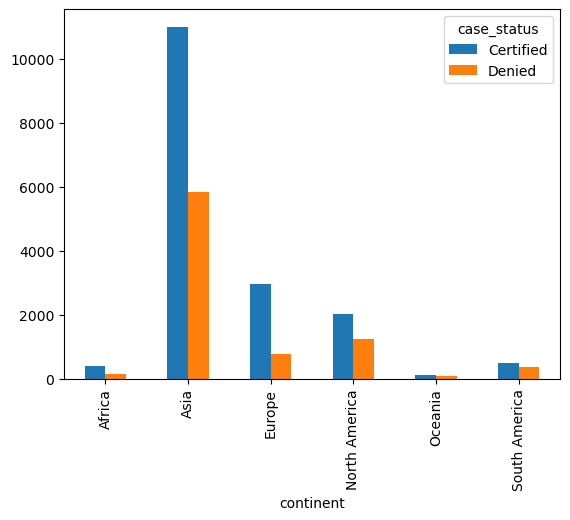

In [36]:
r1.plot(kind = 'bar')

<Axes: xlabel='continent', ylabel='count'>

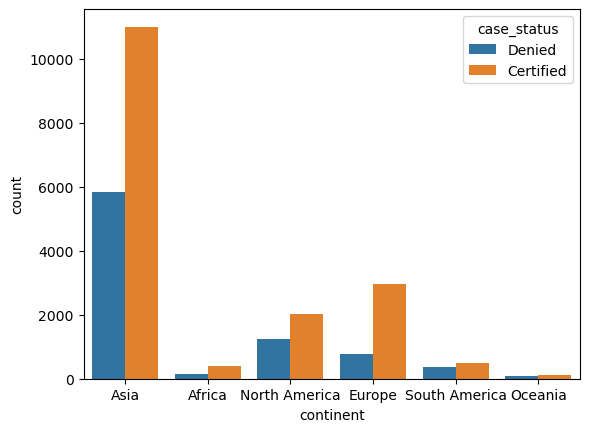

In [38]:
sns.countplot(visa_df,x = 'continent', hue = 'case_status')

- It was only continent vs case status

- we can do more than 2 columns

In [52]:
col1 = visa_df['continent']
col2 = visa_df['education_of_employee']
col3 = visa_df['case_status']
r1 = pd.crosstab(col2,[col1,col3])
r1

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='education_of_employee'>

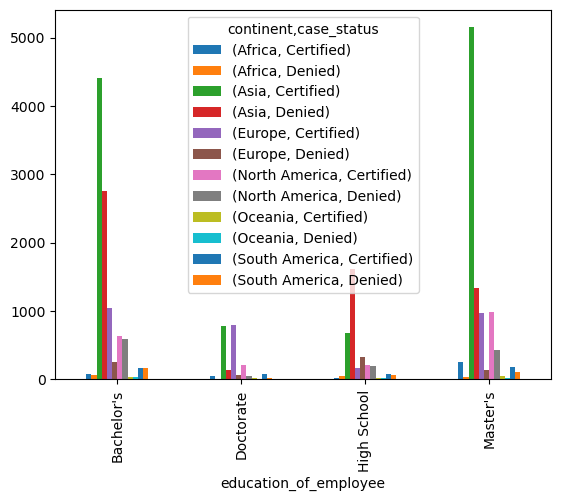

In [54]:
r1.plot(kind = 'bar')

# Scatter Plots

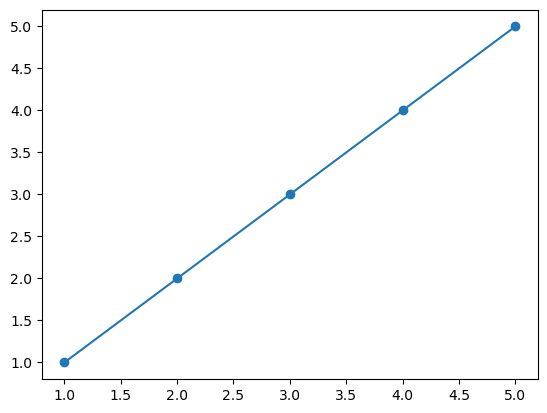

In [62]:
l1 = [1,2,3,4,5]
l2 = [1,2,3,4,5]
plt.scatter(l1,l2)
plt.plot(l1,l2)

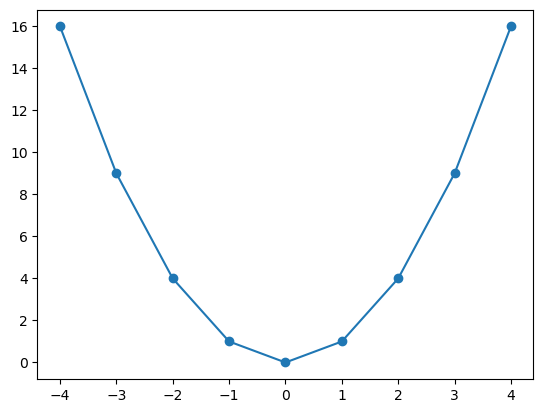

In [74]:
l1 = list(range(-4,5))
l2 = [i*i for i in range(-4,5)]
plt.scatter(l1,l2)
plt.plot(l1,l2)

Text(0.5, 1.0, 'No of Employees VS Year of estab')

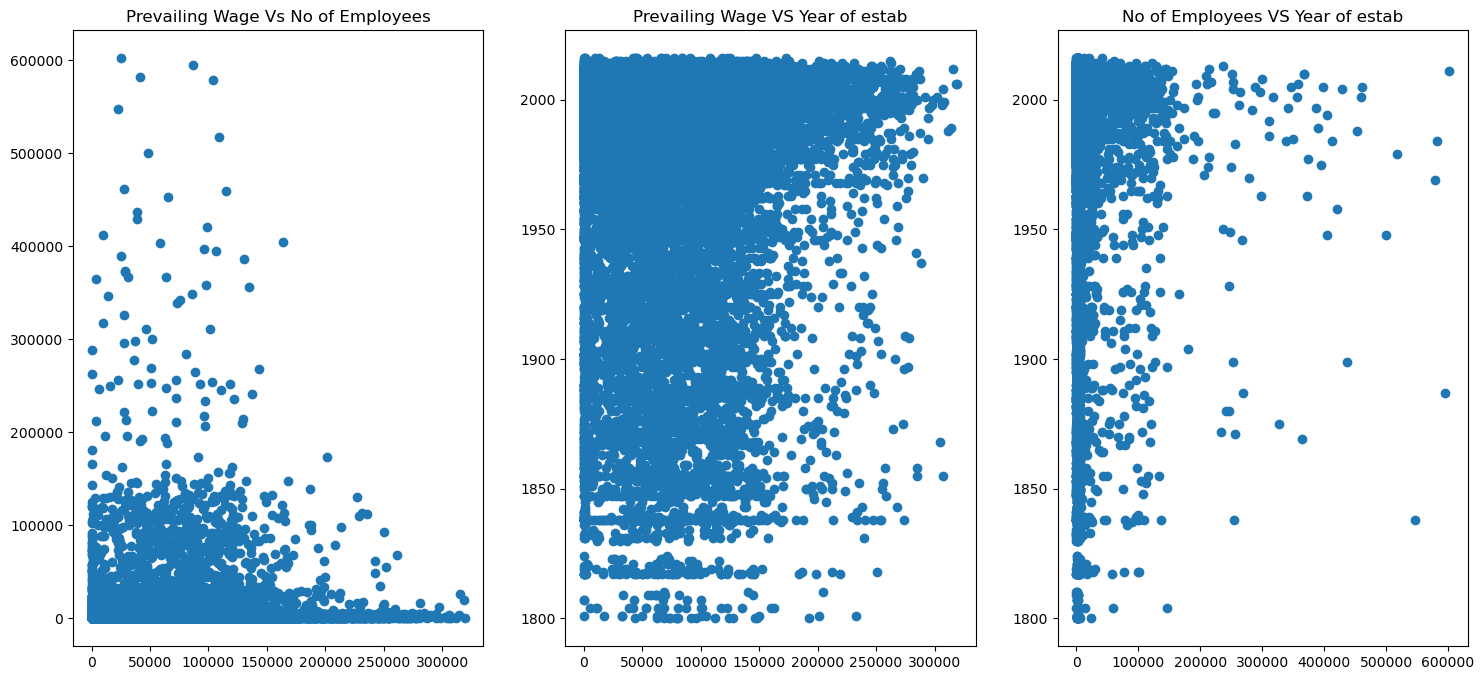

In [90]:
plt.figure(figsize = (18,8))
con1 = visa_df['prevailing_wage']
con2 = visa_df['no_of_employees']
con3 = visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(con1,con2)
plt.title('Prevailing Wage Vs No of Employees')
plt.subplot(1,3,2).scatter(con1,con3)
plt.title('Prevailing Wage VS Year of estab')
plt.subplot(1,3,3).scatter(con2,con3)
plt.title('No of Employees VS Year of estab')

# Correlation

In [98]:
corr = visa_df.corr(numeric_only = True)
corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


# Heatmap

<Axes: >

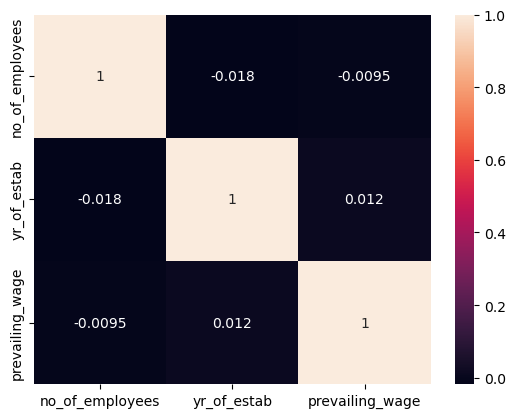

In [104]:
sns.heatmap(corr,annot = True)